In [1]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
#import cv2
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array

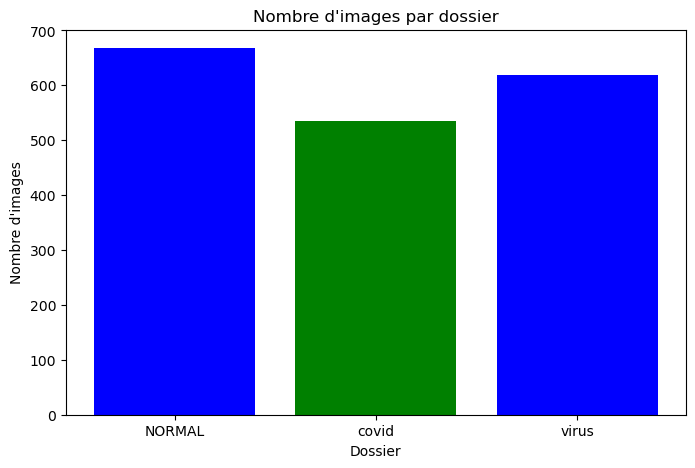

In [2]:
import matplotlib.pyplot as plt
import glob

# Chemin vers les dossiers contenant les images
directories = ['./dataset/NORMAL', './dataset/covid','./dataset/virus']

# Nombre d'images dans chaque dossier
num_images_per_directory = []

for directory in directories:
    img_list = glob.glob(directory + '/*')
    num_images_per_directory.append(len(img_list))

# Noms des dossiers
directory_names = [dir.split('/')[-1] for dir in directories]

# Création du diagramme
plt.figure(figsize=(8, 5))
plt.bar(directory_names, num_images_per_directory, color=['blue', 'green'])
plt.xlabel('Dossier')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par dossier')
plt.show()

In [3]:

import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array

img_size = (224,224)
dir_name = './dataset/covid'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img, color_mode='grayscale', target_size=(img_size))
    temp_img_array = img_to_array(temp_img) / 255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1, 50176)
df_covid = pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0], 2)

# Définir les valeurs pour list_normal, num_images, height, width et channels
# list_normal = ...
# num_images = ...
# height = ...
# width = ...
# channels = ...

# Remodeler list_normal si nécessaire
# list_normal2 = list_normal.reshape(num_images, height * width * channels)

# Créer un DataFrame pour les images normales et attribuer les étiquettes
# df_normal = pd.DataFrame(list_normal2)
# df_normal['label'] = np.full(num_images, 0)  # Assuming 0 represents normal images

# Imprimer les dimensions du DataFrame des images normales
# print(df_normal.shape)

"""import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
img_size = (224,224)
dir_name = './dataset/covid'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img, color_mode='grayscale', target_size=(img_size))

   # temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176)
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],2)
 
list_normal2 = list_normal.reshape(num_images, height * width * channels)
# Creating a DataFrame and assigning labels
df_normal = pd.DataFrame(list_normal2)
df_normal['label'] = np.full(num_images, 0)  # Assuming 0 represents normal images

print(df_normal.shape) """

"import glob\nimport numpy as np\nimport pandas as pd\nfrom keras.preprocessing.image import load_img, img_to_array\nimg_size = (224,224)\ndir_name = './dataset/covid'\nimg_list = glob.glob(dir_name + '/*')\n\nlist_covid = []\nfor img in img_list:\n    temp_img = load_img(img, color_mode='grayscale', target_size=(img_size))\n\n   # temp_img = load_img(img,grayscale=True,target_size=(img_size))\n    temp_img_array = img_to_array(temp_img) /255\n    list_covid.append(temp_img_array)\nlist_covid = np.array(list_covid)\nlist_covid2 = list_covid.reshape(-1,50176)\ndf_covid=pd.DataFrame(list_covid2)\ndf_covid['label'] = np.full(df_covid.shape[0],2)\n \nlist_normal2 = list_normal.reshape(num_images, height * width * channels)\n# Creating a DataFrame and assigning labels\ndf_normal = pd.DataFrame(list_normal2)\ndf_normal['label'] = np.full(num_images, 0)  # Assuming 0 represents normal images\n\nprint(df_normal.shape) "

In [6]:
import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
 
img_size = (224, 224)
dir_name2 = './dataset/NORMAL'
img_list2 = glob.glob(dir_name2 + '/*')

list_normal = []

for img in img_list2:
    temp_img = load_img(img, color_mode='grayscale', target_size=(img_size))

    #temp_img = load_img(img, grayscale=True, target_size=img_size)
    temp_img_array = img_to_array(temp_img) / 255.0  # Normalize pixel values
    list_normal.append(temp_img_array)

list_normal = np.array(list_normal)
num_images, height, width, channels = list_normal.shape
list_normal2 = list_normal.reshape(num_images, height * width * channels)

# Creating a DataFrame and assigning labels
df_normal = pd.DataFrame(list_normal2)
df_normal['label'] = np.full(num_images, 0)  # Assuming 0 represents normal images

print(df_normal.shape)


(668, 50177)


In [7]:
img_size = (224,224)
dir_name3 = './dataset/virus'
img_list3 = glob.glob(dir_name3 + '/*')

list_others = []
for img in img_list3:
    temp_img = load_img(img, color_mode='grayscale', target_size=(img_size))

   # temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_others.append(temp_img_array)
list_others = np.array(list_others)
list_others2 = list_others.reshape(-1,50176)
df_others=pd.DataFrame(list_others2)
df_others['label'] = np.full(df_others.shape[0],1)

df_others.shape 

(619, 50177)

In [8]:
Df = pd.concat([df_covid, df_normal , df_others], ignore_index=True)

In [9]:
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=None)

X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input

np.random.seed(42)
model = Sequential()

model.add(Input(shape=(224, 224, 1)))  # Correct: using Input to specify input shape
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


'''
np.random.seed(42)
model = Sequential()

model.add(BatchNormalization(input_shape=(224,224,1)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])'''

"\nnp.random.seed(42)\nmodel = Sequential()\n\nmodel.add(BatchNormalization(input_shape=(224,224,1)))\n\nmodel.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\nmodel.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.35))\nmodel.add(Dense(3, activation='softmax'))\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])"

In [34]:
#pip show h5py

Name: h5py
Version: 3.11.0
Summary: Read and write HDF5 files from Python
Home-page: 
Author: 
Author-email: Andrew Collette <andrew.collette@gmail.com>
License: BSD-3-Clause
Location: C:\Users\yih\anaconda3\Lib\site-packages
Requires: numpy
Required-by: keras, tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 224, 224, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 23328)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,986,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,042,535 (11.61 MB)

 Trainable params: 3,042,533 (11.61 MB)

 Non-trainable params: 2 (8.00 B)

In [15]:
model_chkpt = ModelCheckpoint('best_mod.keras', monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [16]:
history = model.fit(X_train, Y_train, 
          validation_split=0.20,
          epochs=5, batch_size=32, shuffle=True, 
          callbacks=[model_chkpt ,early_stopping]
         )

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5106 - loss: 1.1728 - val_accuracy: 0.7637 - val_loss: 0.6890
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8992 - loss: 0.2908 - val_accuracy: 0.6027 - val_loss: 0.7680
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9165 - loss: 0.2057 - val_accuracy: 0.9212 - val_loss: 0.3929
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9372 - loss: 0.1869 - val_accuracy: 0.8836 - val_loss: 0.3747
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9446 - loss: 0.1210 - val_accuracy: 0.9521 - val_loss: 0.1919


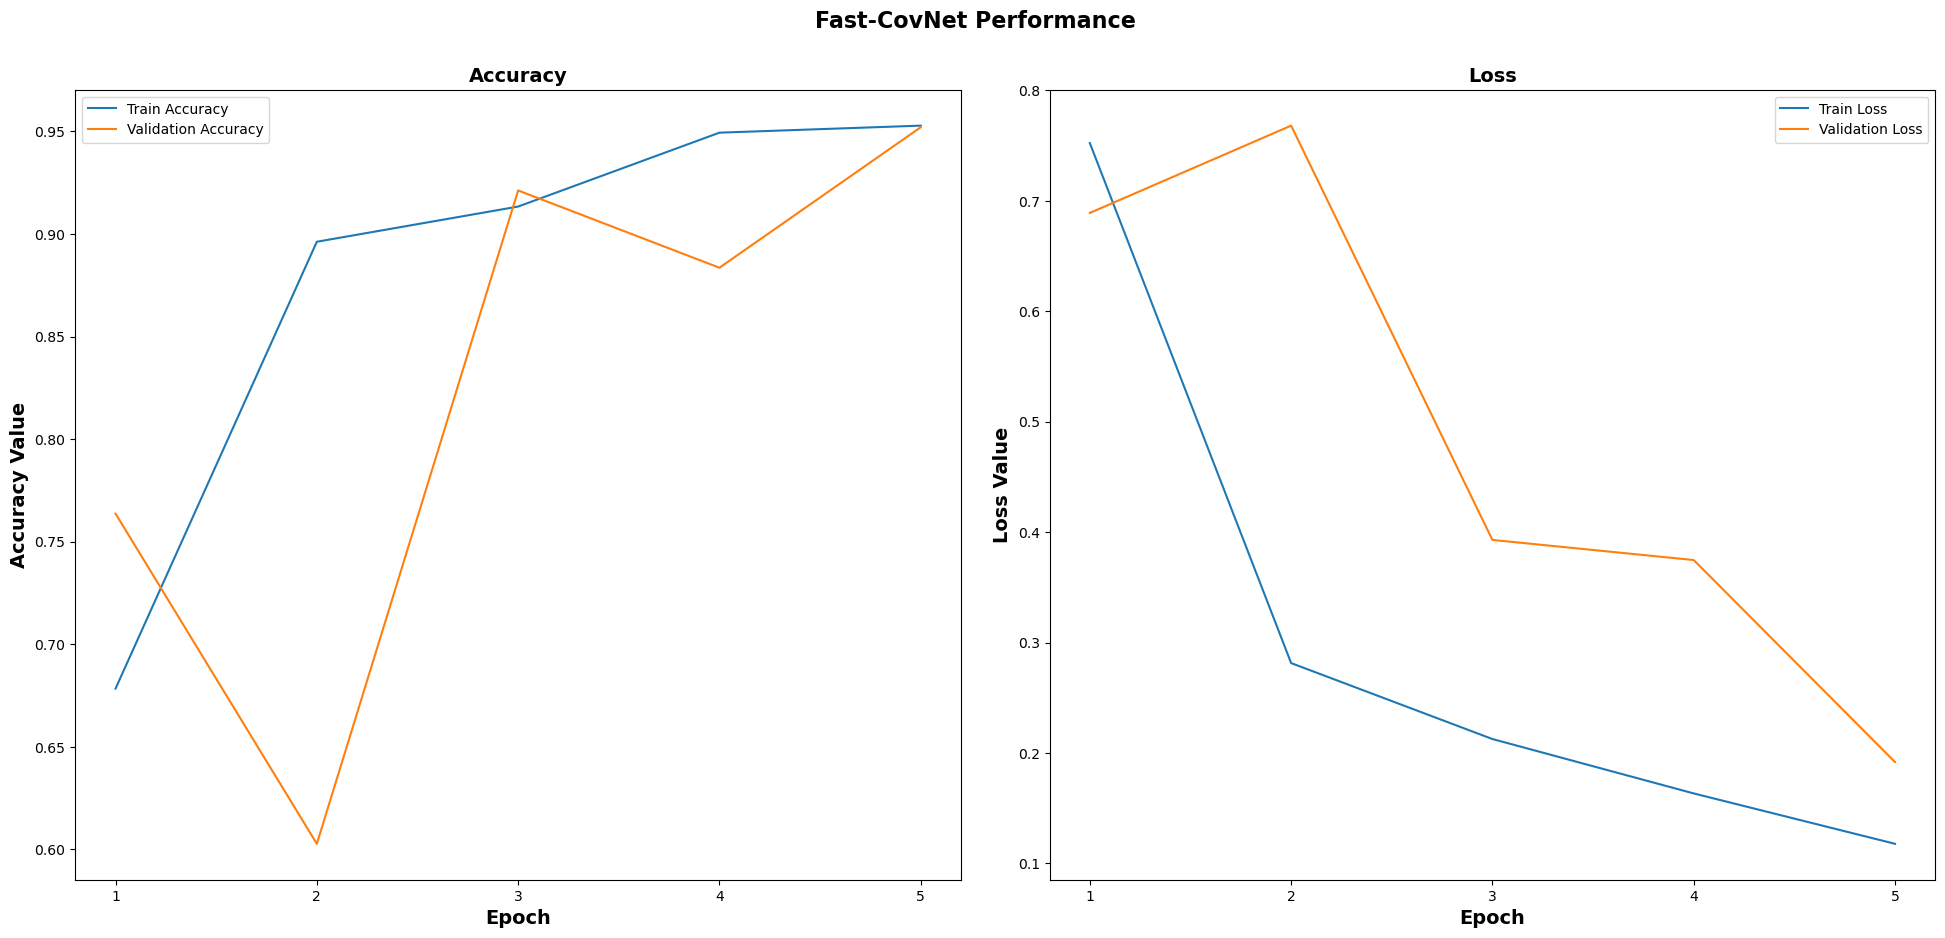

In [17]:
from sklearn.metrics import accuracy_score
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
t = f.suptitle('Fast-CovNet Performance', fontsize=16,fontweight='bold')
f.subplots_adjust(top=0.9, wspace=0.1)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value',fontsize=14,fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax1.set_title('Accuracy', fontsize=14,fontweight='bold')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value',fontsize=14,fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax2.set_title('Loss',fontsize=14,fontweight='bold')
l2 = ax2.legend(loc="best")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step


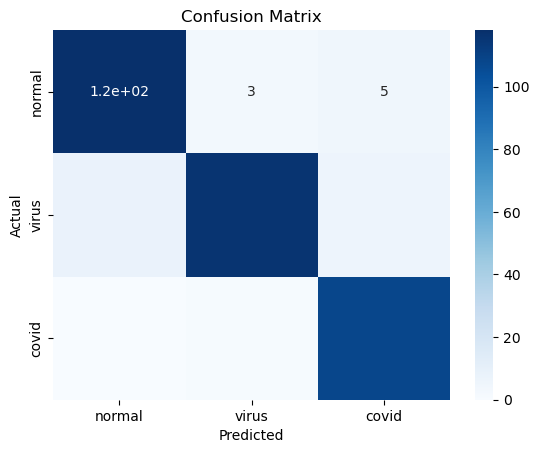

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
plt.figure()
ax = plt.subplot()
ax.set_title('Confusion Matrix')

#pred = model.predict_classes(X_test)
pred = model.predict(X_test)

# Utilisez Y_test pour les étiquettes de classe réelles
Y_TEST = np.argmax(Y_test, axis=1)

# Calculez la matrice de confusion
cm = metrics.confusion_matrix(Y_TEST, np.argmax(pred, axis=1))

# Définissez les étiquettes de classe
classes = ['normal', 'virus', 'covid']

# Affichez la matrice de confusion
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Convert predictions to categorical
PRED = to_categorical(pred)
y = Df['label'].values

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], PRED[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
colors = ['blue', 'red', 'green']
cls = {0: 'normal', 1: 'other pneumonia', 2: 'covid'}

plt.figure()
for i, color, c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(c, roc_auc[i]))

# Corrected the redundant linestyle definition
plt.plot([0, 1], [0, 1], 'k--')  # Removed 'linestyle' argument

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

'''
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
 

PRED = to_categorical(pred)
y = Df['label'].values
# Binarize the output
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])
       colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'other pneumonia', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()
'''

ValueError: multiclass format is not supported

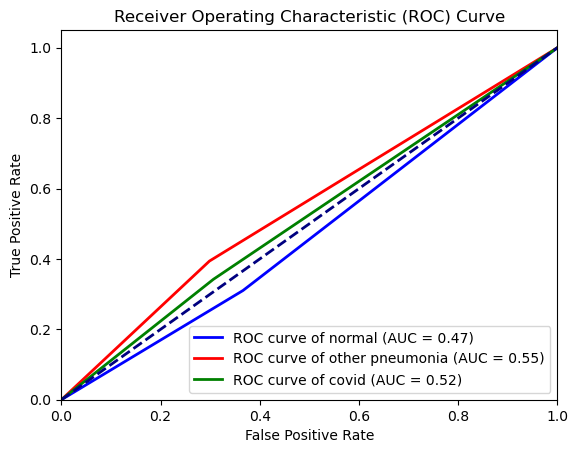

'\nfrom sklearn.metrics import roc_curve, auc\n\n# Calculer les valeurs de FPR, TPR et AUC pour chaque classe\nfpr, tpr, _ = roc_curve(Y_test, PRED)\nroc_auc = auc(fpr, tpr)\n\n# Tracer la courbe ROC\nplt.figure()\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2,\n         label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curve\')\nplt.legend(loc="lower right")\nplt.show()\n'

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Simuler les prédictions et les étiquettes pour l'exemple
# Remplacez cette partie par vos données réelles
# pred = ... (vos prédictions)
# Y_test = ... (vos étiquettes de test)
pred = np.random.randint(0, 3, size=(100,))  # Exemple de prédictions
Y_test = np.random.randint(0, 3, size=(100,))  # Exemple d'étiquettes de test

# Convertir les prédictions en une représentation catégorielle
PRED = to_categorical(pred, num_classes=3)

# Binariser les étiquettes de test
y = label_binarize(Y_test, classes=[0, 1, 2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculer les valeurs de FPR, TPR et AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], PRED[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes ROC pour chaque classe
colors = ['blue', 'red', 'green']
cls = {0: 'normal', 1: 'other pneumonia', 2: 'covid'}

plt.figure()
for i, color, c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(c, roc_auc[i]))

# Tracer la ligne de référence ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



'''
from sklearn.metrics import roc_curve, auc

# Calculer les valeurs de FPR, TPR et AUC pour chaque classe
fpr, tpr, _ = roc_curve(Y_test, PRED)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
'''